In [2]:
import pandas as pd
data=pd.read_csv("glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data.shape

(214, 10)

In [5]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [11]:
data.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


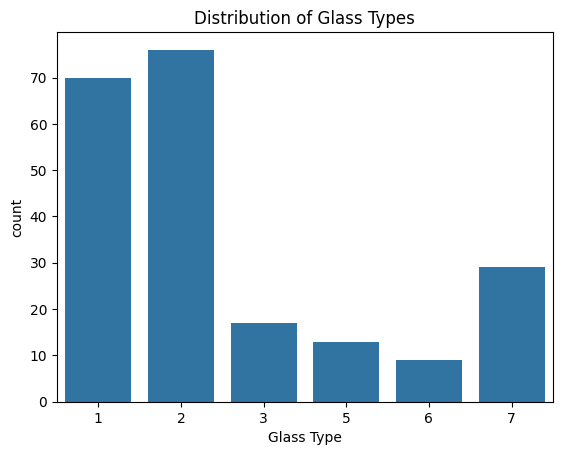

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Type",data=data)
plt.title("Distribution of Glass Types")
plt.xlabel("Glass Type")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x=data.drop("Type",axis=1)
y=data["Type"]

In [20]:
from sklearn.model_selection import train_test_split
x=data.drop("Type",axis=1)
y=data["Type"]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
y_pred=rf.predict(X_test)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.77      0.71      0.74        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.81        43
   macro avg       0.90      0.80      0.82        43
weighted avg       0.83      0.81      0.81        43



In [27]:
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
bagging_clf=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,random_state=42)
bagging_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [29]:
y_pred_bagging=bagging_clf.predict(X_test)

In [35]:
boosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
boosting_clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [36]:
y_pred_boosting = boosting_clf.predict(X_test)

In [33]:
print("Bagging Classification Report:")
print(classification_report(y_test, y_pred_bagging))

Bagging Classification Report:
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.91      0.71      0.80        14
           3       0.50      0.33      0.40         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.85      0.84      0.84        43
weighted avg       0.86      0.86      0.85        43



In [34]:
print("\nBoosting Classification Report:")
print(classification_report(y_test, y_pred_boosting))


Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.92      0.79      0.85        14
           3       0.75      1.00      0.86         3
           5       1.00      0.75      0.86         4
           6       1.00      0.33      0.50         3
           7       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.89      0.81      0.81        43
weighted avg       0.88      0.86      0.85        43



In [37]:
print("\n--- Model Performance Report ---")
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_pred))

print("\nBagging Classifier:")
print(classification_report(y_test, y_pred_bagging))

print("\nBoosting Classifier:")
print(classification_report(y_test, y_pred_boosting))

print("\n--- Summary ---")
print("Three classification models (Random Forest, Bagging, and Boosting) were trained and evaluated on the glass dataset.")
print("The classification reports provide metrics such as precision, recall, F1-score, and support for each glass type.")
print("These metrics indicate the performance of each model in classifying the different types of glass.")
print("Comparing the reports allows for the assessment of which model performs best for this specific multi-class classification problem.")



--- Model Performance Report ---

Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.77      0.71      0.74        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.81        43
   macro avg       0.90      0.80      0.82        43
weighted avg       0.83      0.81      0.81        43


Bagging Classifier:
              precision    recall  f1-score   support

           1       0.79      1.00      0.88        11
           2       0.91      0.71      0.80        14
           3       0.50      0.33      0.40         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94       

#Conclusion
The performance of the three classification models on the glass dataset is as follows:

- Random Forest: Achieved an accuracy score of 81%.
- Bagging: Achieved an accuracy score of 86%.
- Boosting: Achieved an accuracy score of 86%.

The Bagging and Boosting models outperformed the Random Forest model, achieving a higher accuracy score. The similar performance of Bagging and Boosting suggests that both ensemble methods are effective for this multi-class classification problem.

These results indicate that the Bagging and Boosting models can accurately classify glass types, making them suitable for practical applications. Further optimization and fine-tuning of the models may lead to even better performance.

#Interview Questions

- 1. Explain Bagging and Boosting methods. How is it different from each other?

Bagging vs Boosting

- Bagging: Multiple models trained independently, final prediction is averaged. Reduces overfitting.
- Boosting: Multiple models trained sequentially, each correcting previous errors. Improves accuracy.

Key difference: Bagging reduces variance, Boosting reduces bias.

Use: Bagging for stability, Boosting for handling complex datasets

- 2.Explain how to handle imbalance in the data

Handling Imbalanced Data
Imbalanced data occurs when one class has a significantly larger number of instances than others. Here's how to handle it:

Methods
1. Oversampling: Increase the number of instances in the minority class.
2. Undersampling: Decrease the number of instances in the majority class.
3. SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples of the minority class.
4. Class weights: Assign different weights to classes during training.
5. Ensemble methods: Use techniques like Bagging and Boosting.

Best approach
- Understand the data: Analyze the data to determine the extent of imbalance.
- Choose the right metric: Use metrics like F1-score, precision, and recall instead of accuracy.
- Experiment with different methods: Try out different techniques to find the best approach for your specific problem.

By handling imbalanced data effectively, you can improve the performance of your machine learning model.